# A Monte Carlo Simulation of your Retirement Planning 💵💵

## Intuition

There are countless people who planned their retirement by saving a monthly sum and investing it into the stock market 📈📈📈.

There are also plenty of investment gurus advocating this investment strategy that is known as "Passive Investment", which means you do not try to time the market, but rather you invest periodically no matter the current level of market.

I prepare my future nest egg 🥚🥚 this way too, as an engineer who won't be convinced without seeing the data, I am going to do some research on the practicality of this approach by using Monte Carlo Simulation.

## Historical Returns of Dow Jones Index

I chose Dow Jones Index as many people (including me), invests in the 🇺🇸 US market, where Dow Jones Index is the primary index of the US Market. 

Here is some analysis on the historical returns on Dow Jones Index.

---

### Reading Data using Pandas module 🐼🐼

I am using data from 2021 to 1915.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

DJI = pd.read_csv('DJI.csv')
DJI.head()

,Year,Open,High,Low,Close,Adj. Close,Return
0,2021,"30,909.43","30,223.89","31,188.38","30,223.89","31,176.01",0.02
1,2020,"26,890.67","28,868.80","30,606.48","18,591.93","30,606.48",0.07
2,2019,"26,379.55","23,346.24","28,645.26","22,686.22","28,538.44",0.22
3,2018,"25,046.86","24,824.01","26,828.39","21,792.20","23,327.46",-0.06
4,2017,"21,750.20","19,881.76","24,837.51","19,732.40","24,719.22",0.25


### Some Intuition into the Stats 🧮

For a normal distribution, 95% of all occurence happens within 2 standard deviations away from the mean. 

Although we are not dealing with perfect normal distribution, but the distribution gives roughly the same pattern. Note that this does not include the possibility of a **Black Swan** (super rare, unexpected, high consequence events).

![bomb](stdev.png)

In [2]:
mean = DJI['Return'].mean()
std = DJI['Return'].std()
lowerbound = mean - 2*std
upperbound = mean + 2*std

print("Mean return        : {:.2f}".format(mean))
print("Standard Deviation : {:.2f}".format(std))

Mean return        : 0.08
Standard Deviation : 0.21


### Distribution of Dow Jones Index Yearly Returns

We get the mean and standard deviation on the returns. But we can visualize it better on a histogram.

The distribution of yearly historical returns of Dow Jones Index are similar to a normal distribution, with peak at middle and tails at both side.

The mean return and standard deviation are calculated.
Note how I plotted 2 straight lines of 2 standard deviations away from mean.

Using the below plot we can say that **95% of all returns of Dow Jones are between -33% and +49%.**

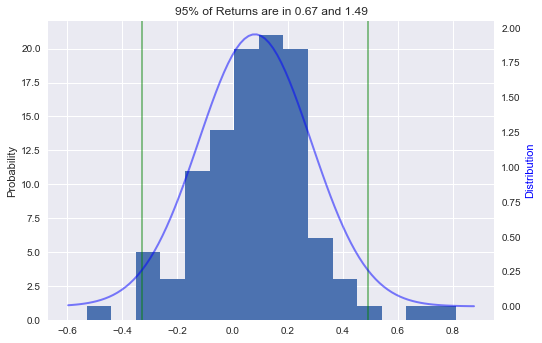

In [3]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.axvline(x = upperbound, color='g', linestyle='-', alpha=0.5, label = 'mean')
plt.axvline(x = lowerbound, color='g', linestyle='-', alpha=0.5, label = 'mean')

#---------Histogram------------------------------------------------------------------------------------
title = str('95% of Returns are in {:.2f}'.format(1 + lowerbound) + ' and {:.2f}'.format(1 + upperbound))
DJI['Return'].hist(bins=15, ax = ax1)
ax1.set_ylabel('Probability')

#---------Fitting the histogram with curve-------------------------------------------------------------
mu, std = norm.fit(DJI['Return'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax2.plot(x, p, 'b', linewidth=2, alpha = 0.5)
ax2.grid(False)
ax2.set_ylabel('Distribution', color='b')

#--------Show the plot
plt.title(title)
plt.show()

### Can *YOU* invest your way to a Millionaire? 💰💰💰

Let's assume an individual who invests RM5000 as initial investment and for every month he invests RM400 more into his portfolio.

Using this plan he will end up with **RM168,200**

Final value : 168200.00


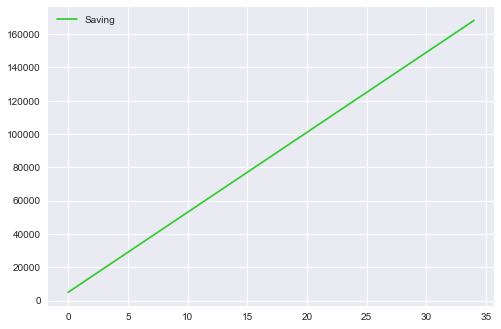

In [4]:
#-----Constants-----------------------
INITIAL_INVESTMENT = 5000
MONTHLY_TOPUP = 400
YEARLY = MONTHLY_TOPUP * 12
# ------------------------------------

saving = [INITIAL_INVESTMENT]

for i in range(1, 35):
    saving.append((saving[i - 1]) + YEARLY)

capital = pd.DataFrame(saving, columns=['Saving'])

#------Plotting the savings growth------
capital.plot(y='Saving', color='limegreen', alpha = 1)
print('Final value : {:.2f}'.format(capital['Saving'].iloc[ -1]))

### Monte Carlo Simulation

**RM168,200** might be little after 30 plus years, how about investing along the way?

Stock market returns are uncertain, but prior analysis shown that we can expect 95% of the return to be between -33% and +49%. 

I am going to use Monte Carlo simulation to simulate 50 different scenarios,
where the returns are generated randomly within -33% and +49%.

It's like Dr. Strange seeing 50 possibilites of the saving journey.

![bomb](meme.jpg)

At the end, I will get the median of all the scenarios and use it as reference.

Why median? You might ask.

Mean is too sensitive to overly big values, so I used median to get a realistic view.

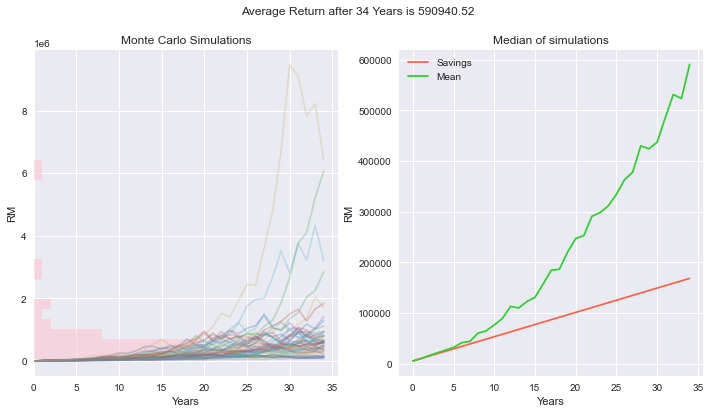

In [6]:
from random import randrange

#-----Using upperbound and lowerbound of historical returns-------
RAND_TOP = 149
RAND_BOT = 68
YEAR = 34

#------Generate 50 simulations------------------------------------
for k in range(1, 50):
    capital[str('Capital' + str(k))] = capital['Saving']
    for i in range(1, len(capital)):
        capital.loc[i, str('Capital' + str(k))] = (capital.loc[i - 1, str('Capital' + str(k))] + YEARLY) * float(
            randrange(RAND_BOT, RAND_TOP) / 100)

capital['Mean'] = capital.median(axis=1)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(('Average Return after ' + str(YEAR) + ' Years is %.2f' % capital['Mean'][capital.index[YEAR]]))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

capital.plot(legend=None,alpha=0.3, title = 'Monte Carlo Simulations', xlabel = 'Years', ylabel = 'RM', ax = ax)
capital.iloc[-1].hist(bins=20, orientation="horizontal", color="pink", alpha=0.5,ax = ax)

capital.plot(y='Saving', color = 'tomato', alpha = 1, label="Savings", xlabel = 'Years', ylabel = 'RM', title = 'Median of simulations', ax = ax2)
capital.plot(y='Mean', color='limegreen', alpha = 1, ax = ax2)

plt.show()

### Key Takeaways ⚡⚡

Every time you run this notebook the outcome will be different (It's a simulation!)

Maybe 2 in 50 lifetimes you will be fortunate enough to have a superbull market that can make you a millionaire using this plan.

But I observed that the final value converges toward **RM500,000.**

If you wanted to be a millionaire by the time you retire, you might need to save more. (Or get more luck)